In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import neattext.functions as nfx
import numpy as np
plt.style.use('ggplot')
from wordcloud import WordCloud
from textblob import TextBlob


In [2]:
df = pd.read_csv('D:/tweet_emotions.csv')
df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [3]:
df.isnull().sum()

tweet_id     0
sentiment    0
content      0
dtype: int64

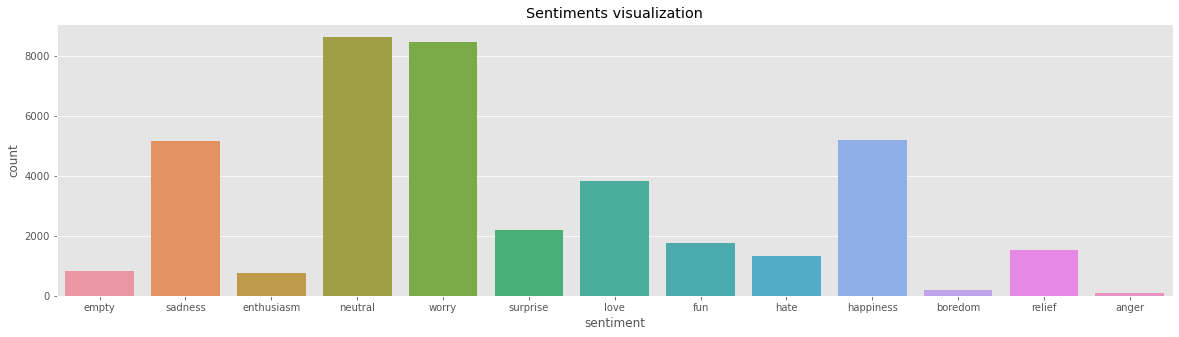

In [7]:
#Visualization of the sentiments
plt.figure(figsize=(20,5))
plt.title('Sentiments visualization')
sns.countplot(x='sentiment',data=df)
plt.show()

In [8]:
#Counting the words in the sentences
def no_of_words(txt):
    words = txt.split()
    words_count = len(words)
    return words_count

In [9]:
df['Count_Words'] = df['content'].apply(no_of_words)

In [10]:
df.head()

,tweet_id,sentiment,content,Count_Words
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,18
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,10
2,1956967696,sadness,Funeral ceremony...gloomy friday...,3
3,1956967789,enthusiasm,wants to hang out with friends SOON!,7
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,15


In [15]:
#Text cleaning/Preprocessing of the data
df['content']=df['content'].apply(nfx.remove_special_characters)
df['content']=df['content'].apply(nfx.remove_punctuations)
df['content'] = df['content'].apply(nfx.remove_urls)
df['content'] = df['content'].apply(nfx.remove_emails)
df['content'] = df['content'].apply(nfx.remove_numbers)
df['content'] = df['content'].apply(nfx.remove_multiple_spaces)
df['content'] = df['content'].apply(nfx.remove_stopwords)


In [16]:
df.head()

,tweet_id,sentiment,content,Count_Words
0,1956967341,empty,tiffanylue know listenin bad habit earlier sta...,18
1,1956967666,sadness,Layin n bed headache ughhhhwaitin,10
2,1956967696,sadness,Funeral ceremonygloomy friday,3
3,1956967789,enthusiasm,wants hang friends SOON,7
4,1956968416,neutral,dannycastillo want trade Houston tickets,15


In [17]:
df.shape

(40000, 4)

In [18]:
df.sentiment.unique()

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

In [19]:
#Replacing the sentiments with values
df.sentiment.replace('empty',0,inplace=True)
df.sentiment.replace('sadness',1,inplace=True)
df.sentiment.replace('enthusiasm',2,inplace=True)
df.sentiment.replace('neutral',3,inplace=True)
df.sentiment.replace('worry',4,inplace=True)
df.sentiment.replace('surprise',5,inplace=True)
df.sentiment.replace('love',6,inplace=True)
df.sentiment.replace('fun',7,inplace=True)
df.sentiment.replace('hate',8,inplace=True)
df.sentiment.replace('happiness',9,inplace=True)
df.sentiment.replace('boredom',10,inplace=True)
df.sentiment.replace('relief',11,inplace=True)
df.sentiment.replace('anger',12,inplace=True)

In [22]:
empty_tweets = df[df.sentiment==0]
empty_tweets.head()

,tweet_id,sentiment,content,Count_Words
0,1956967341,0,tiffanylue know listenin bad habit earlier sta...,18
44,1956978276,0,creyes middle school elem High schools remain ...,20
52,1956979917,0,djmicdamn hey yu lil fucker textd yu,8
141,1957000336,0,softtouchme answered learned write French basi...,14
180,1957007357,0,headache Im going bed Goodnight,8


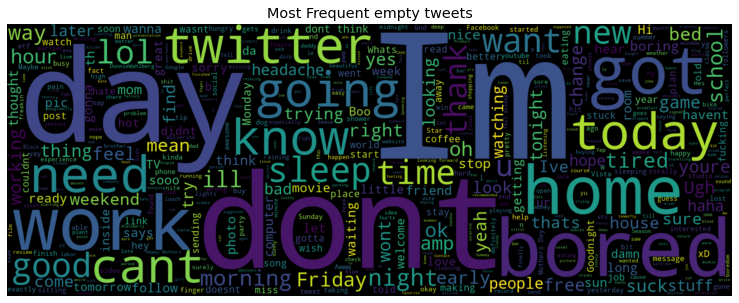

In [25]:
text = ' '.join(word for word in empty_tweets['content'])
plt.figure(figsize=(20,5))
wordcloud = WordCloud(max_words=500,height=600,width=1600).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent empty tweets')
plt.show()

In [29]:
saddness_tweets = df[df.sentiment == 1]
saddness_tweets.head()

,tweet_id,sentiment,content,Count_Words
1,1956967666,1,Layin n bed headache ughhhhwaitin,10
2,1956967696,1,Funeral ceremonygloomy friday,3
6,1956968487,1,sleep im thinking old friend want hes married ...,26
8,1956969035,1,charviray Charlene love miss,7
9,1956969172,1,kelcouch Im sorry Friday,7


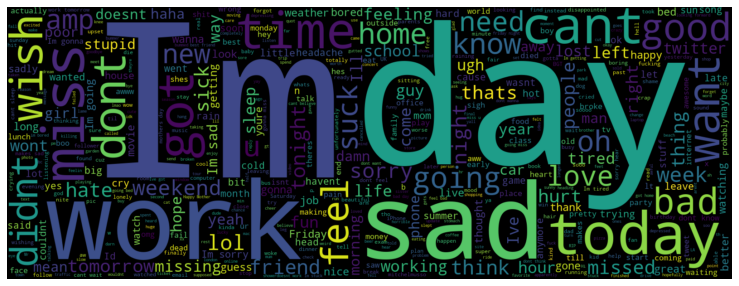

In [31]:
text = ' '.join(words for words in saddness_tweets['content'])
plt.figure(figsize=(20,5))
wordcloud = WordCloud(max_words=500,height=600,width=1600).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [34]:
enthusiasm_tweets = df[df.sentiment==2]

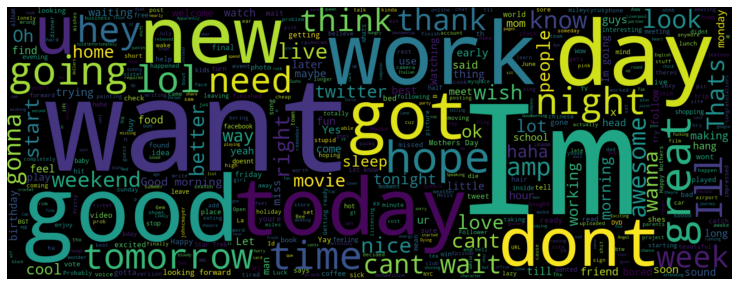

In [36]:
text = ' '.join(words for words in enthusiasm_tweets['content'])
plt.figure(figsize=(20,5))
wordcloud = WordCloud(max_words=500,height=600,width=1600).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [58]:
#implementing the machine learning model
from sklearn.feature_extraction.text import *
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import *
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier

In [38]:
x= df['content']
y= df['sentiment']

In [42]:
vector = TfidfVectorizer()
x= vector.fit_transform(df['content'])

In [43]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=0)

In [44]:
nb = MultinomialNB()
nb.fit(xtrain,ytrain)

MultinomialNB()

In [52]:
nb_pred = nb.predict(xtest)
nb_acc= accuracy_score(ytest,nb_pred)

In [56]:
print("accuracy score is:{:2f}%".format(nb_acc*100))

accuracy score is:28.458333%


In [75]:
print(confusion_matrix(ytest,nb_pred))
print('\n')
print(classification_report(ytest,nb_pred))

[[   0    2    0  104  124    0    1    0    0    5    0    0    0]
 [   0   19    0  326 1224    0    2    0    0   12    0    0    0]
 [   0    0    0   85  129    0    4    0    0    6    0    0    0]
 [   0    9    0 1189 1338    0   23    0    0   61    0    0    0]
 [   0   13    0  582 1900    0    9    0    0   20    0    0    0]
 [   0    5    0  234  395    0    7    0    0   19    0    0    0]
 [   0    4    0  384  530    0  144    0    0  125    0    0    0]
 [   0    0    0  220  257    0    3    0    0   30    0    0    0]
 [   0    3    0   55  306    0    0    0    0    2    0    0    0]
 [   0    3    0  644  724    0   24    0    0  163    0    0    0]
 [   0    1    0   14   41    0    0    0    0    0    0    0    0]
 [   0    1    0  166  254    0    3    0    0   19    0    0    0]
 [   0    0    0   14   19    0    0    0    0    0    0    0    0]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       236
    

In [59]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=4,random_state=100 )

In [61]:
dtree.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=4,
                       random_state=100)

In [63]:
dtree_pred = dtree.predict(xtest)

In [67]:
dtree_acc= accuracy_score(ytest,dtree_pred)
print("accuracy score is:{:2f}%".format(dtree_acc*100))

accuracy score is:24.683333%


In [68]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,max_depth=2,min_samples_leaf=4,criterion='entropy')

In [69]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', max_depth=2, min_samples_leaf=4)

In [70]:
rfc_pred = rfc.predict(xtest)

In [71]:
rfc_pred

array([4, 3, 3, ..., 3, 3, 4], dtype=int64)

In [74]:
rfc_acc = accuracy_score(ytest,rfc_pred)
print("accuracy score is:{:2f}%".format(rfc_acc*100))

accuracy score is:23.766667%


## Improving the model

In [77]:
#Applying sentiments to the model
def getPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [78]:
df['Polarity'] = df['content'].apply(getPolarity)

In [79]:
df.head()

,tweet_id,sentiment,content,Count_Words,Polarity
0,1956967341,0,tiffanylue know listenin bad habit earlier sta...,18,-0.35
1,1956967666,1,Layin n bed headache ughhhhwaitin,10,0.00
2,1956967696,1,Funeral ceremonygloomy friday,3,0.00
3,1956967789,2,wants hang friends SOON,7,0.20
4,1956968416,3,dannycastillo want trade Houston tickets,15,0.00


In [91]:
#Adding polarity labels to the model
def getLabels(a):
    if a>0:
        return 'Positive'
    elif a==0:
        return 'Neutral'
    else:
        return 'Negative'

In [92]:
df['Polarity_sentiment']=df['Polarity'].apply(getLabels)

In [93]:
df.head()

,tweet_id,sentiment,content,Count_Words,Polarity,Polarity_sentiment
0,1956967341,0,tiffanylue know listenin bad habit earlier sta...,18,-0.35,Negative
1,1956967666,1,Layin n bed headache ughhhhwaitin,10,0.00,Neutral
2,1956967696,1,Funeral ceremonygloomy friday,3,0.00,Neutral
3,1956967789,2,wants hang friends SOON,7,0.20,Positive
4,1956968416,3,dannycastillo want trade Houston tickets,15,0.00,Neutral


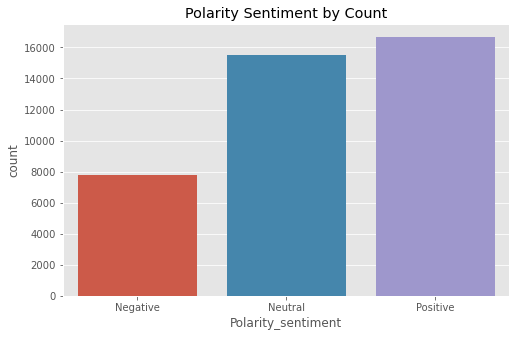

In [94]:
#Visualization
plt.figure(figsize=(8,5))
sns.countplot(x='Polarity_sentiment',data=df)
plt.title('Polarity Sentiment by Count')
plt.show()

In [95]:
Neg_tweets = df[df.Polarity_sentiment=='Negative']

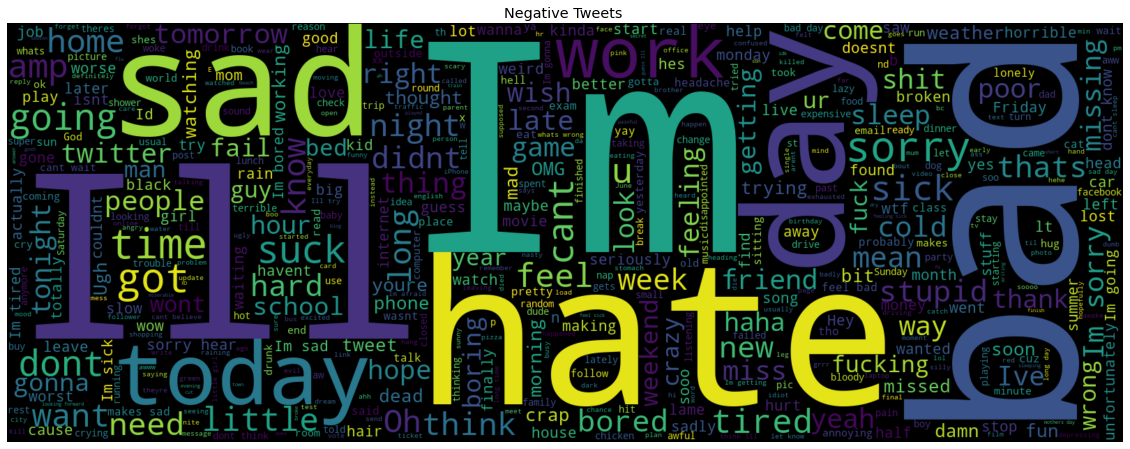

In [100]:
text = ' '.join(words for words in Neg_tweets['content'])
plt.figure(figsize=(20,15))
plt.title('Negative Tweets ')
wordcloud = WordCloud(max_words=500,height=600,width=1600).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [99]:
Pos_tweets = df[df.Polarity_sentiment=='Positive']

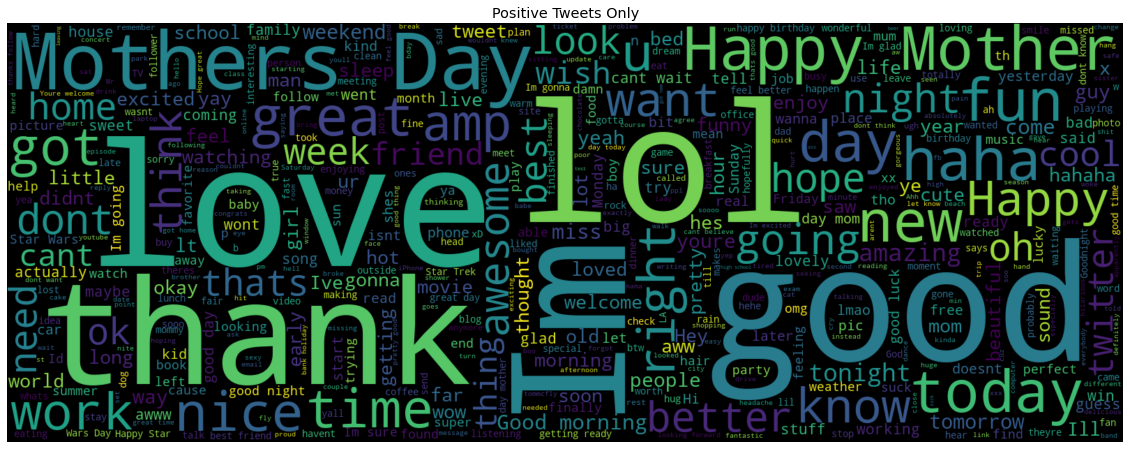

In [101]:
text = ' '.join(words for words in Pos_tweets['content'])
plt.figure(figsize=(20,15))
plt.title('Positive Tweets Only')
wordcloud = WordCloud(max_words=500,height=600,width=1600).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [102]:
neu_tweets = df[df.Polarity_sentiment=='Neutral']

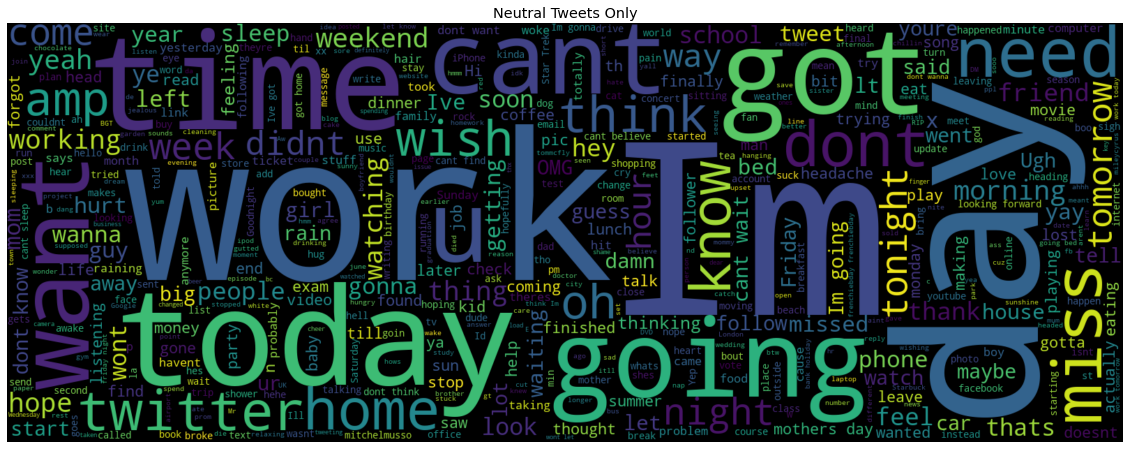

In [103]:
text = ' '.join(words for words in neu_tweets['content'])
plt.figure(figsize=(20,15))
plt.title('Neutral Tweets Only')
wordcloud = WordCloud(max_words=500,height=600,width=1600).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [104]:
#Count of the Words
from collections import Counter
count = Counter()
for text in Pos_tweets['content'].values:
    for word in text.split():
        count[word] +=1
count.most_common(20)

[('good', 1740),
 ('day', 1489),
 ('love', 1242),
 ('Im', 1177),
 ('lol', 887),
 ('new', 830),
 ('like', 792),
 ('great', 723),
 ('im', 686),
 ('Happy', 674),
 ('happy', 666),
 ('today', 651),
 ('fun', 636),
 ('got', 611),
 ('dont', 587),
 ('know', 578),
 ('time', 555),
 ('u', 553),
 ('haha', 536),
 ('work', 516)]

In [110]:
df_Pos = pd.DataFrame(count.most_common(20), columns=['Words','Count'])

In [111]:
df_Pos.head()

,Words,Count
0,good,1740
1,day,1489
2,love,1242
3,Im,1177
4,lol,887


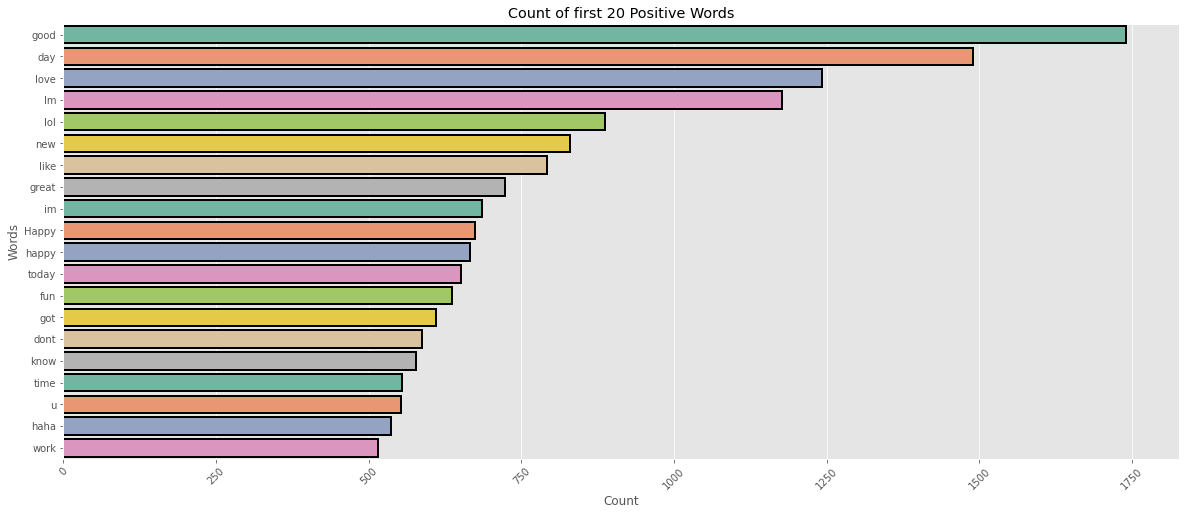

In [121]:
plt.figure(figsize=(20,8))
sns.barplot(x='Count',y='Words',data=df_Pos,palette='Set2',edgecolor='black',linewidth=2)
plt.title('Count of first 20 Positive Words')
plt.xlabel('Count')
plt.ylabel('Words')
plt.xticks(rotation=45)
plt.show()

In [127]:
from collections import Counter
count = Counter()
for text in Neg_tweets['content'].values:
    for word in text.split():
        count[word]+=1
count.most_common(30)
    

[('Im', 800),
 ('sad', 516),
 ('bad', 512),
 ('im', 491),
 ('like', 472),
 ('sorry', 406),
 ('hate', 392),
 ('day', 385),
 ('dont', 365),
 ('work', 350),
 ('Ill', 350),
 ('cant', 326),
 ('today', 325),
 ('got', 323),
 ('going', 316),
 ('sick', 313),
 ('know', 286),
 ('time', 282),
 ('tired', 253),
 ('feel', 253),
 ('little', 247),
 ('think', 238),
 ('u', 227),
 ('amp', 227),
 ('long', 226),
 ('sucks', 223),
 ('ill', 218),
 ('home', 206),
 ('bored', 200),
 ('night', 199)]

In [128]:
Neg_df = pd.DataFrame(count.most_common(30), columns=['NegWords','Count'])

In [130]:
Neg_df.head()

,NegWords,Count
0,Im,800
1,sad,516
2,bad,512
3,im,491
4,like,472


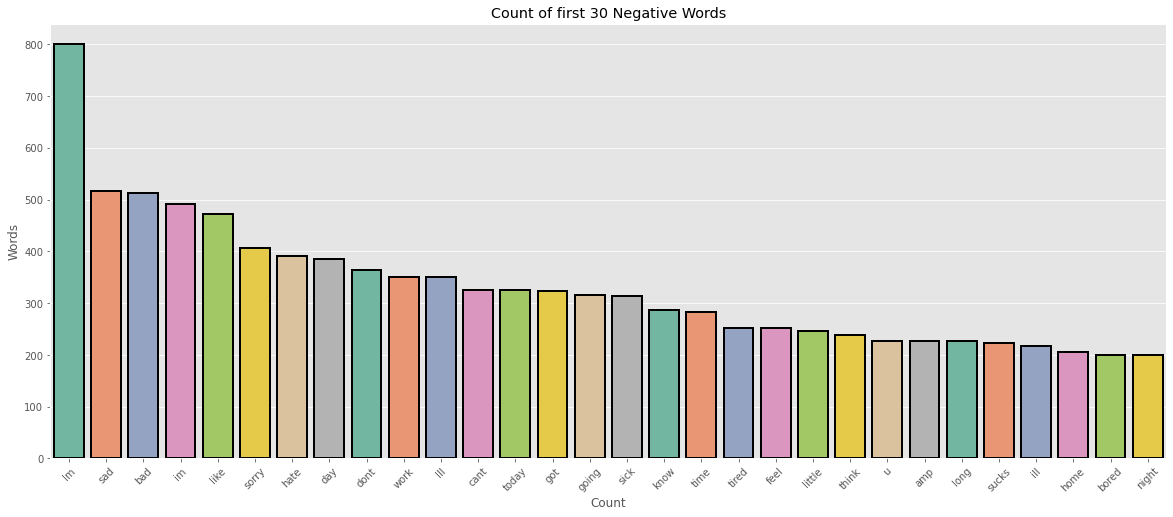

In [131]:
plt.figure(figsize=(20,8))
sns.barplot(x='NegWords',y='Count',data=Neg_df,palette='Set2',edgecolor='black',linewidth=2)
plt.title('Count of first 30 Negative Words')
plt.xlabel('Count')
plt.ylabel('Words')
plt.xticks(rotation=45)
plt.show()

In [133]:
count = Counter()
for text in neu_tweets['content'].values:
    for word in text.split():
        count[word]+=1
count.most_common(25)

[('Im', 759),
 ('work', 654),
 ('like', 600),
 ('dont', 584),
 ('cant', 554),
 ('going', 546),
 ('got', 526),
 ('day', 499),
 ('today', 484),
 ('im', 444),
 ('know', 440),
 ('want', 438),
 ('time', 417),
 ('home', 401),
 ('u', 392),
 ('miss', 377),
 ('think', 350),
 ('need', 305),
 ('amp', 272),
 ('night', 267),
 ('wish', 249),
 ('tonight', 247),
 ('didnt', 245),
 ('tomorrow', 244),
 ('twitter', 213)]

In [134]:
Neu_df = pd.DataFrame(count.most_common(25),columns=['NeuWords','Count'])

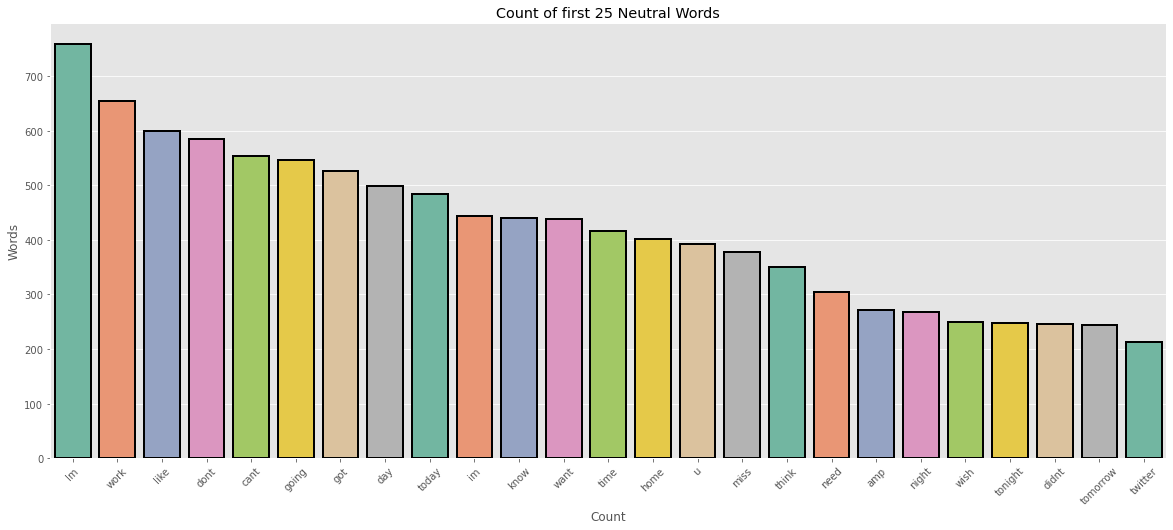

In [137]:
plt.figure(figsize=(20,8))
sns.barplot(x='NeuWords',y='Count',data=Neu_df,palette='Set2',edgecolor='black',linewidth=2)
plt.title('Count of first 25 Neutral Words')
plt.xlabel('Count')
plt.ylabel('Words')
plt.xticks(rotation=45)
plt.show()

In [139]:
df.Polarity_sentiment.replace('Positive',2,inplace=True)
df.Polarity_sentiment.replace('Negative',1,inplace=True)
df.Polarity_sentiment.replace('Neutral',0,inplace=True)

In [141]:
#a= df['content']
b= df['Polarity_sentiment']

In [144]:
xtrain,xtest,b_train,b_test = train_test_split(x,b,test_size=0.2,random_state=100)

In [148]:
#Building a Model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain,b_train)
lr_pred = lr.predict(xtest)

In [155]:
lr_acc = accuracy_score(b_test,lr_pred)
print('Accuracy score is: {:}%'.format(lr_acc*100))

Accuracy score is: 90.8125%


In [159]:
print("Confusion Matrix is: \n",confusion_matrix(b_test,lr_pred))
print("\n")
print("Classification report is : \n",classification_report(b_test,lr_pred))

Confusion Matrix is: 
 [[3040   18   31]
 [ 296 1189  107]
 [ 240   43 3036]]


Classification report is : 
               precision    recall  f1-score   support

           0       0.85      0.98      0.91      3089
           1       0.95      0.75      0.84      1592
           2       0.96      0.91      0.94      3319

    accuracy                           0.91      8000
   macro avg       0.92      0.88      0.89      8000
weighted avg       0.91      0.91      0.91      8000



In [165]:
mt = MultinomialNB()
mt.fit(xtrain,b_train)
mt_pred = mt.predict(xtest)
mt_acc = accuracy_score(b_test,mt_pred)

In [166]:
print('Accuracy score is: {:}%'.format(mt_acc*100))

Accuracy score is: 69.89999999999999%


In [167]:
print("Confusion Matrix is: \n",confusion_matrix(b_test,mt_pred))
print("\n")
print("Classification report is : \n",classification_report(b_test,mt_pred))

Confusion Matrix is: 
 [[1958    6 1125]
 [ 203  366 1023]
 [  50    1 3268]]


Classification report is : 
               precision    recall  f1-score   support

           0       0.89      0.63      0.74      3089
           1       0.98      0.23      0.37      1592
           2       0.60      0.98      0.75      3319

    accuracy                           0.70      8000
   macro avg       0.82      0.62      0.62      8000
weighted avg       0.79      0.70      0.67      8000



In [172]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(xtrain,b_train)
sv_pred = svc.predict(xtest)
sv_acc = accuracy_score(b_test,sv_pred)

In [173]:
print('Accuracy score is: {:}%'.format(sv_acc*100))

Accuracy score is: 94.77499999999999%


In [175]:
print("Confusion Matrix is: \n",confusion_matrix(b_test,sv_pred))
print("\n")
print("Classification report is : \n",classification_report(b_test,sv_pred))

Confusion Matrix is: 
 [[3038   20   31]
 [ 125 1392   75]
 [ 120   47 3152]]


Classification report is : 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      3089
           1       0.95      0.87      0.91      1592
           2       0.97      0.95      0.96      3319

    accuracy                           0.95      8000
   macro avg       0.95      0.94      0.94      8000
weighted avg       0.95      0.95      0.95      8000



In [177]:
#Cross validation Test
#Cross Validation Test
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1, 1, 10, 100],'loss':['hinge','squared_hinge']}
grid = GridSearchCV(svc,param_grid,refit=True,verbose=3)
grid.fit(xtrain,b_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ..............................C=0.1, loss=hinge; total time=   0.8s
[CV 2/5] END ..............................C=0.1, loss=hinge; total time=   0.6s
[CV 3/5] END ..............................C=0.1, loss=hinge; total time=   0.8s
[CV 4/5] END ..............................C=0.1, loss=hinge; total time=   1.0s
[CV 5/5] END ..............................C=0.1, loss=hinge; total time=   0.9s
[CV 1/5] END ......................C=0.1, loss=squared_hinge; total time=   0.2s
[CV 2/5] END ......................C=0.1, loss=squared_hinge; total time=   0.2s
[CV 3/5] END ......................C=0.1, loss=squared_hinge; total time=   0.2s
[CV 4/5] END ......................C=0.1, loss=squared_hinge; total time=   0.2s
[CV 5/5] END ......................C=0.1, loss=squared_hinge; total time=   0.2s
[CV 1/5] END ................................C=1, loss=hinge; total time=   4.5s
[CV 2/5] END ................................C=1,

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'loss': ['hinge', 'squared_hinge']},
             verbose=3)

In [178]:
print('Best Cross Validation: {:.2f}%'.format(grid.best_score_*100))
print('Best parameters: ',grid.best_params_)

Best Cross Validation: 95.00%
Best parameters:  {'C': 10, 'loss': 'hinge'}


## THE END OF THE PROJECT